   # The Sparks Foundation

## Graduate Rotational Internship Program (GRIP) 

### DECEMBER 2022 Batch

# Candidate Name : Abdul Jaweed

# Task 6 : Prediction Using Decision Tree Algorithm 

#### Objective of the Task is to Create the Decision Tree Classifier and Visualize it Graphically.

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Dataset

from sklearn.datasets import load_iris

iris = load_iris()
X=iris.data[:,:] 
y=iris.target

In [3]:
df=pd.DataFrame(iris['data'],columns=["Petal length","Petal Width","Sepal Length","Sepal Width"])

In [4]:
df['Species']=iris['target']

In [5]:
df['Species']=df['Species'].apply(lambda x: iris['target_names'][x])

In [6]:
df.head()

,Petal length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
df.tail()

,Petal length,Petal Width,Sepal Length,Sepal Width,Species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [8]:
df.sample(6)

,Petal length,Petal Width,Sepal Length,Sepal Width,Species
127,6.1,3.0,4.9,1.8,virginica
112,6.8,3.0,5.5,2.1,virginica
124,6.7,3.3,5.7,2.1,virginica
95,5.7,3.0,4.2,1.2,versicolor
91,6.1,3.0,4.6,1.4,versicolor
123,6.3,2.7,4.9,1.8,virginica


## EDA 

In [9]:
df.shape

(150, 5)

In [10]:
# checking the information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Petal length  150 non-null    float64
 1   Petal Width   150 non-null    float64
 2   Sepal Length  150 non-null    float64
 3   Sepal Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
df.columns

Index(['Petal length', 'Petal Width', 'Sepal Length', 'Sepal Width',
       'Species'],
      dtype='object')

In [12]:
# checking the missing values

df.isnull().sum()

Petal length    0
Petal Width     0
Sepal Length    0
Sepal Width     0
Species         0
dtype: int64

In [13]:
# checking the duplicated values

df.duplicated().sum()

1

In [14]:
# checking the statistical summary of the data

df.describe()

,Petal length,Petal Width,Sepal Length,Sepal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Data Visualization

<Figure size 2500x2500 with 0 Axes>

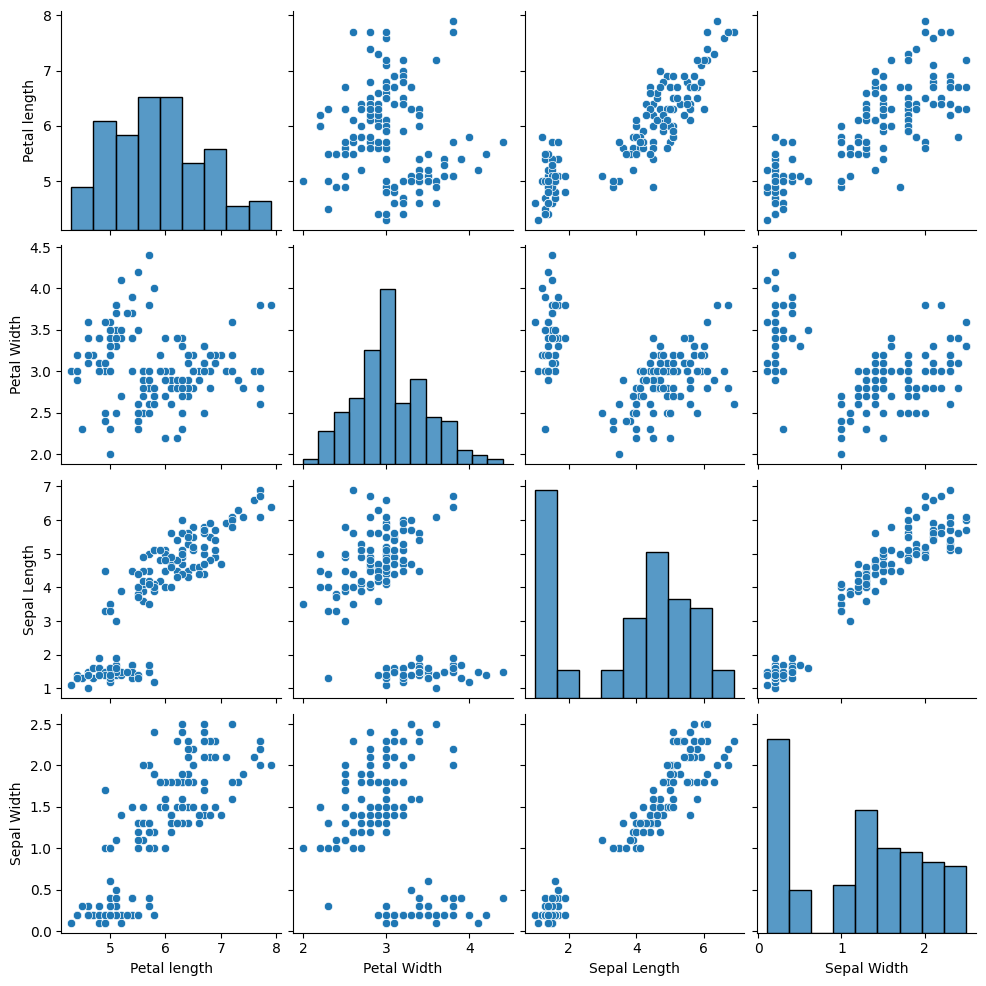

In [15]:
# Visualize iris dataset

plt.figure(figsize=(25,25))
sns.pairplot(df)
plt.show()

<Figure size 2500x2500 with 0 Axes>

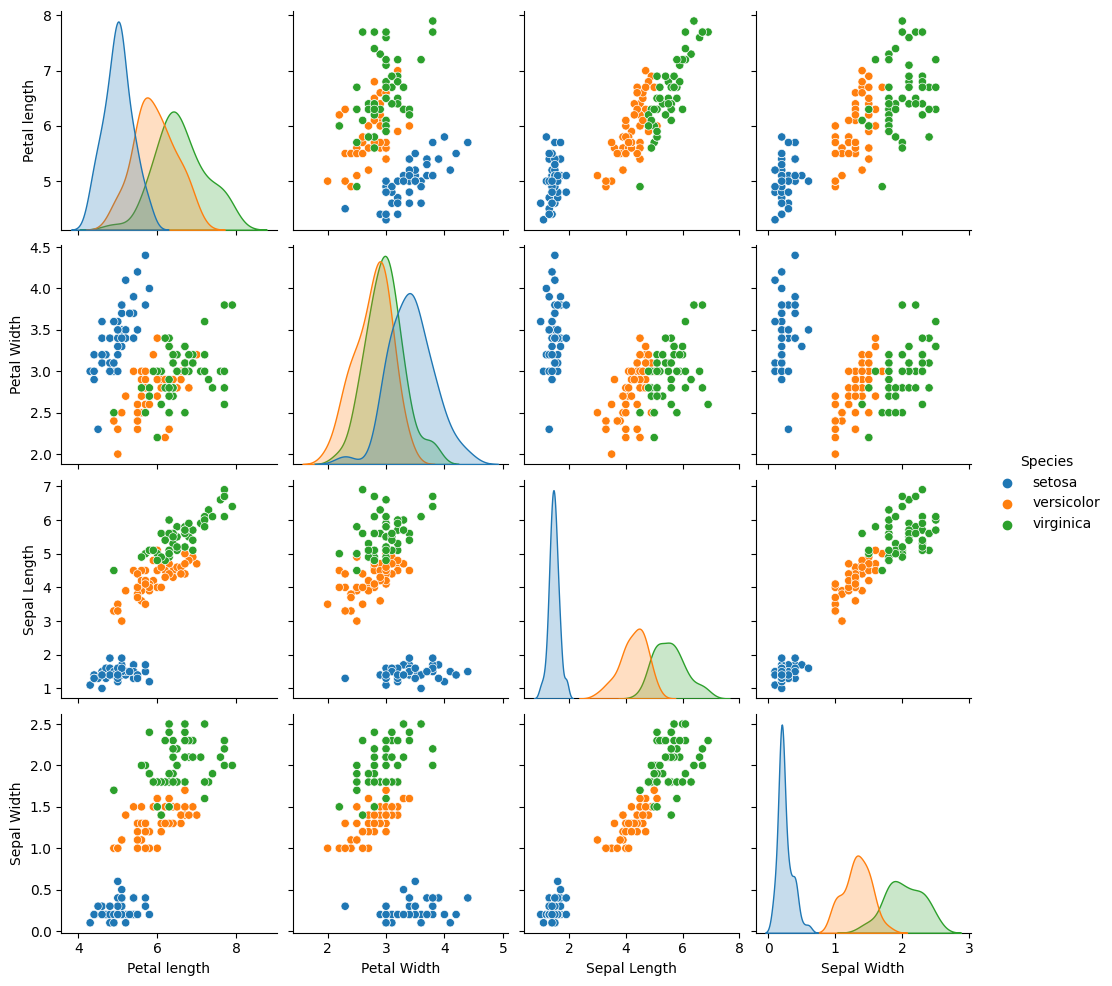

In [16]:
plt.figure(figsize=(25,25))
sns.pairplot(df, hue='Species')
plt.show()

In [17]:
# checking the correlation of the given data

df.corr()

,Petal length,Petal Width,Sepal Length,Sepal Width
Petal length,1.000000,-0.117570,0.871754,0.817941
Petal Width,-0.117570,1.000000,-0.428440,-0.366126
Sepal Length,0.871754,-0.428440,1.000000,0.962865
Sepal Width,0.817941,-0.366126,0.962865,1.000000


[]

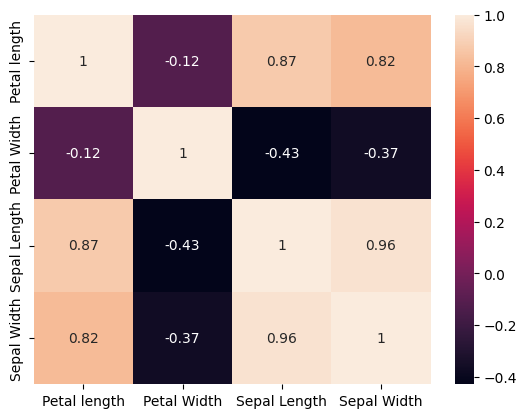

In [18]:
#correaltion matrix

sns.heatmap(df.corr(), annot = True)
plt.plot()

## Model Building

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
import matplotlib.pyplot as plt
import pydot
from IPython.display import Image

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

In [21]:
classifier = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 2)

In [22]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [23]:
y_pred = classifier.predict(X_test)

In [24]:
value = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 

In [25]:
value.head()

,Actual,Predicted
0,1,1
1,2,2
2,1,1
3,0,0
4,1,1


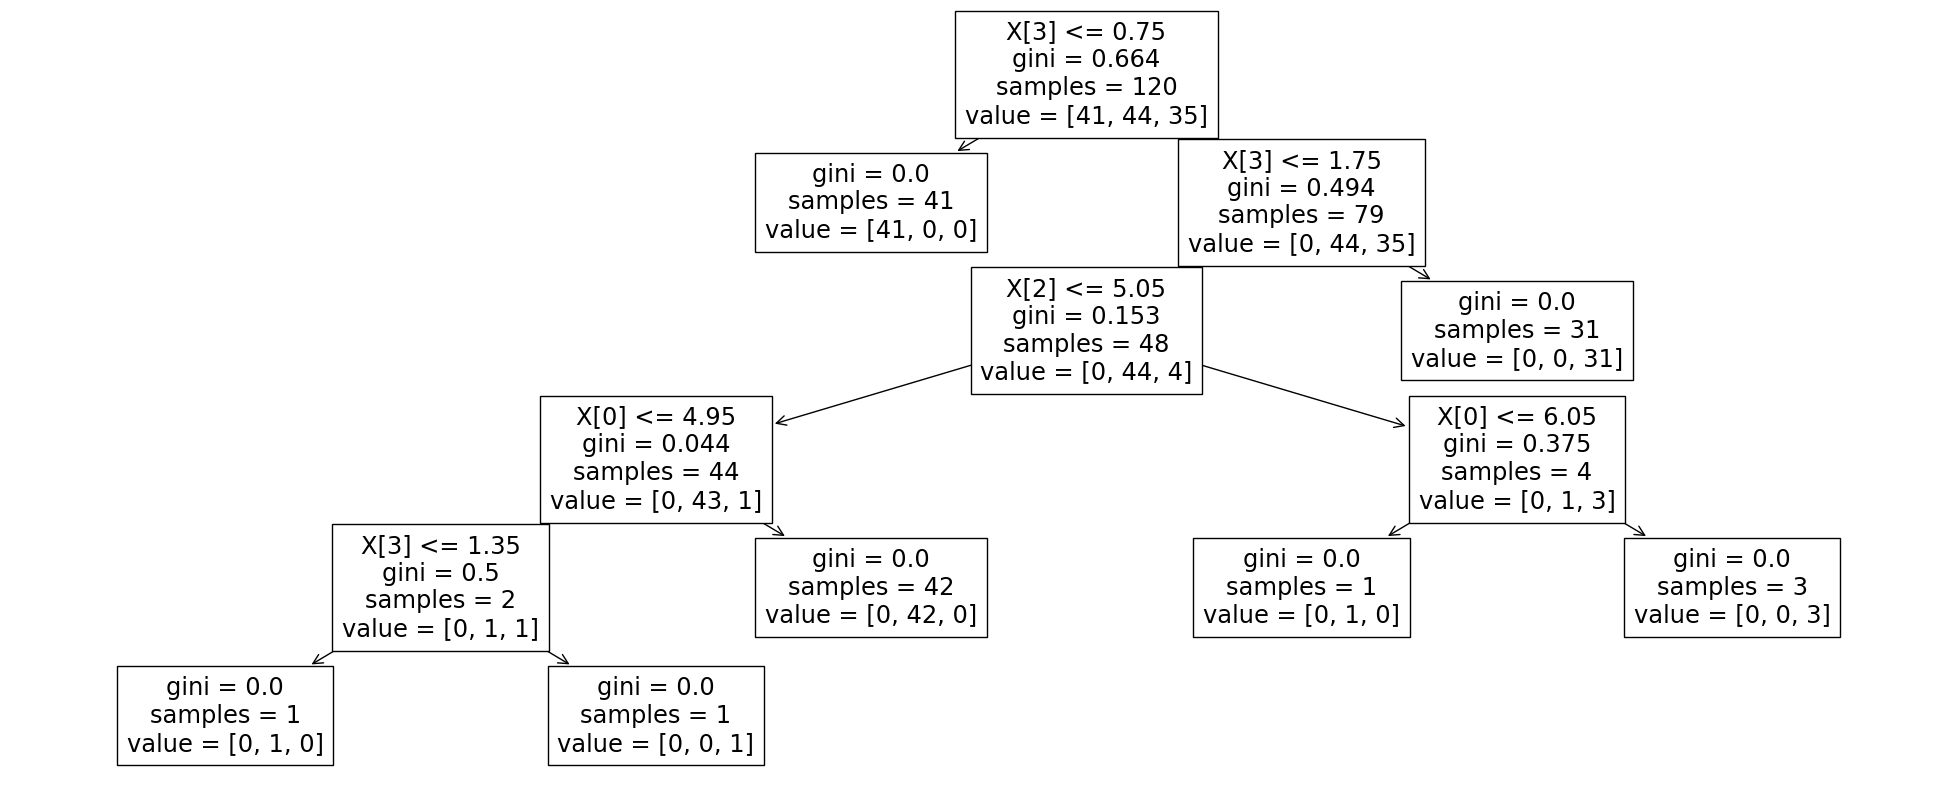

In [27]:
# visualizing the tree which is formed on training set

tree.plot_tree(classifier)
plt.rcParams['figure.figsize']=(25,10)    